#### Import dependencies

In [1]:
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt

from utils_tf import benchmark_matmul
from utils_tf import benchmark_conv
from utils_tf import benchmark_rnn
from utils_tf import benchmark_cnn

#### Parameters

In [2]:
kernelsize = 15
iterations = 3
num_gpu = 0
devlist = ''
datatype = 'float32'

#### Run and plot matrix multiplication benchmark

In [3]:
numsteps = 25

timeUsedMult = np.zeros(numsteps)
opsMult = np.zeros(numsteps)
matsizeMult = np.zeros(numsteps)
for step in range(0,numsteps):
    matsizeMult[step] = (step+1)*50
    opsMult[step] = (matsizeMult[step]**3 
                     + (matsizeMult[step]-1)*matsizeMult[step]**2)     
    # matsize**3 multiplications, (matsize-1)*matsize**2 additions
    timeUsedMult[step] = benchmark_matmul.benchmark_matmul(
            matsizeMult[step],
            iterations,
            num_gpu,
            devlist,
            datatype)

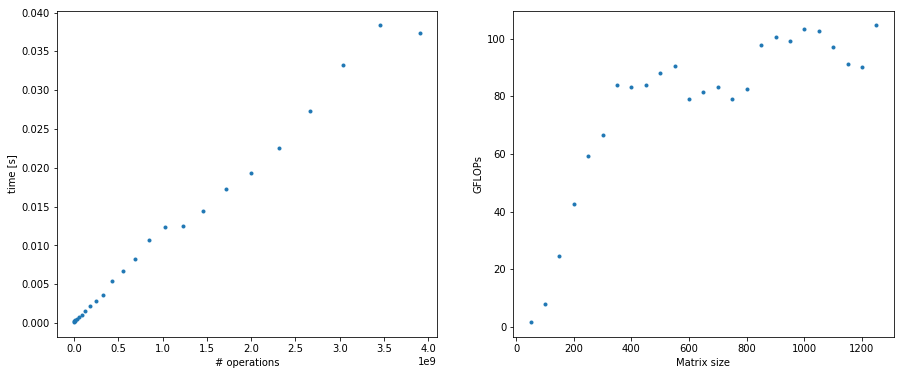

In [4]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 6))

ax1.plot(opsMult,timeUsedMult,'.')
ax1.set_xlabel("# operations")
ax1.set_ylabel("time [s]")

ax2.plot(matsizeMult,opsMult*1e-9/timeUsedMult,'.')
ax2.set_xlabel("Matrix size")
ax2.set_ylabel("GFLOPs")
plt.show()

#### Run and plot convolution benchmark

In [5]:
numsteps = 25

timeUsedConv = np.zeros(numsteps)
opsConv = np.zeros(numsteps)
matsizeConv = np.zeros(numsteps)

for step in range(0,numsteps):
    matsizeConv[step] = (step+1)*50
    opsConv[step] = ((matsizeConv[step]-kernelsize+1)**2 
                     * (kernelsize**3 + (kernelsize-1)*kernelsize**2))     
    # (matsize.kernelsize+1)**2 GEMMs
    timeUsedConv[step] = benchmark_conv.benchmark_conv(
            matsizeConv[step],
            kernelsize,
            iterations,
            num_gpu,
            devlist,
            datatype)

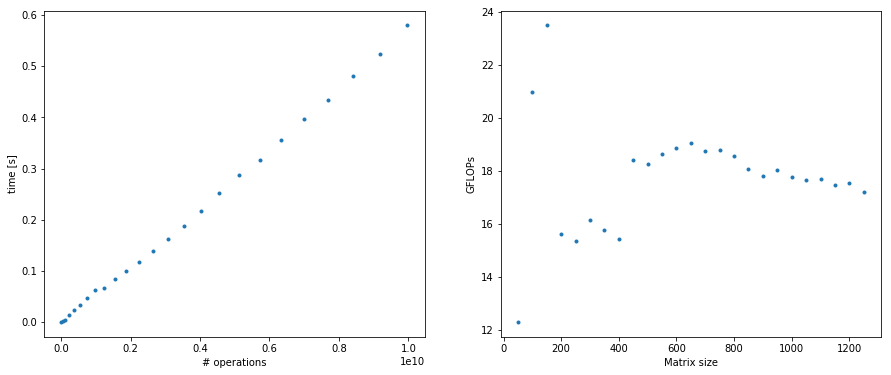

In [6]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 6))

ax1.plot(opsConv,timeUsedConv,'.')
ax1.set_xlabel("# operations")
ax1.set_ylabel("time [s]")

ax2.plot(matsizeConv,opsConv*1e-9/timeUsedConv,'.')
ax2.set_xlabel("Matrix size")
ax2.set_ylabel("GFLOPs")
plt.show()

#### Parameters RNN


In [7]:
rnn_type = 'rnn'
batch_size = 32
num_samples = 10000
num_units = 32
num_classes = 10
learning_rate = 0.001
iterations_rnn = 1000

#### Run and plot RNN bechmark

In [8]:
numsteps = 50

timeUsedRNN = np.zeros(numsteps)
seq_length = np.zeros(numsteps).astype(np.int16)

for step in range(0,numsteps):
    seq_length[step] = (step+2)

    timeUsedRNN[step] = benchmark_rnn.benchmark_rnn(
            rnn_type,
            seq_length[step],
            batch_size,
            num_samples,
            num_units,
            num_classes,
            learning_rate,
            iterations_rnn,
            num_gpu,
            devlist,
            datatype)

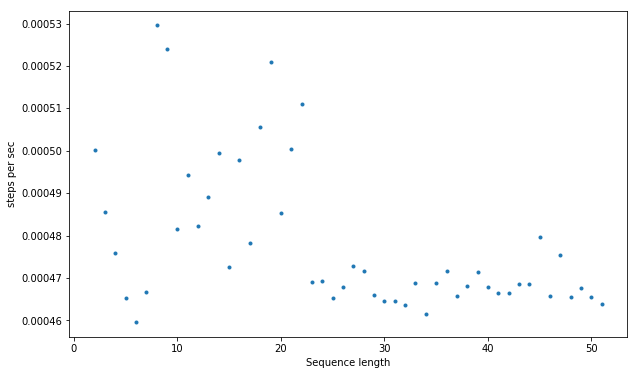

In [9]:
f, (ax1) = plt.subplots(1,1,figsize=(10, 6))
ax1.plot(seq_length,timeUsedRNN,'.')
ax1.set_xlabel("Sequence length")
ax1.set_ylabel("steps per sec")
plt.show()

#### Run and plot CNN benchmark

In [10]:
data_dir = '/tmp/cifar10_data'
steps_cnn = 10

In [11]:
numsteps = 8

timeUsedCNN = np.zeros(numsteps)
batch_size_cnn = np.zeros(numsteps,dtype=np.int32)

for step in range(numsteps):
    batch_size_cnn[step] = 2**step
    timeUsedCNN[step] = benchmark_cnn.train(
            data_dir,
            batch_size_cnn[step],
            steps_cnn,
            num_gpu,
            devlist)/(batch_size_cnn[step]*steps_cnn)

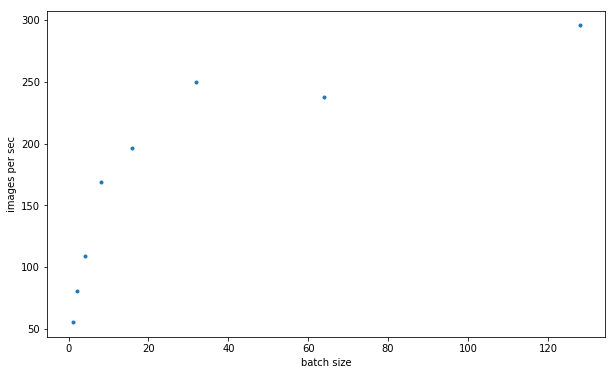

In [12]:
f, (ax1) = plt.subplots(1,1,figsize=(10, 6))
ax1.plot(batch_size_cnn,1/timeUsedCNN,'.')
ax1.set_xlabel("batch size")
ax1.set_ylabel("images per sec")
plt.show()